<a href="https://colab.research.google.com/github/bmsousa2/quarentenadados/blob/master/Quarentenadados_Aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd

#Importando Dataset

filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')


notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')

#Vizualização dos dados

filmes.head()

notas.head()

#Salvando medias dos filmes em uma variavel

notas_medias_por_filme = notas.groupby('movieId')['rating'].mean()
notas_medias_por_filme.head(20)

#Criando nova colunas no dataset filmes com as informações da media por filmes

filmes_com_media = filmes.join(notas_medias_por_filme, on='movieId')
filmes_com_media

#Ordenando notas do Dataset por ordem crescente

filmes_com_media.sort_values('rating', ascending=False).head()


,movieId,title,genres,rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0



**
Desafio 1** - Determine quantos filmes não tem avaliações e quais são esses filmes.

In [105]:

filmes_com_media.isnull().sum()

filmes_com_medias_nan = filmes_com_media.loc[filmes_com_media['rating'].isnull()]

filmes_com_medias_nan

,movieId,title,genres,rating
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


**Desafio** 2 - Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [106]:
#Aproveitei para renomear as colunas que estavão em EN para PT-BR

filmes_com_media.columns = ['filmeId','Titulo','Genero','Nota_media']
filmes_com_media.columns


Index(['filmeId', 'Titulo', 'Genero', 'Nota_media'], dtype='object')

**Desafio** 3  - Colocar o número de avaliações por filme, isto é, não só a dia mas o TOTAL de votos por filme.

In [107]:
total_votos_por_filme = notas.groupby('movieId')['rating'].count().to_frame('total_votos').reset_index()
total_votos_por_filme.head()

total_votos_por_filme.columns = ['filmeId','total_votos']
total_votos_por_filme.head()

filmes_com_media = filmes_com_media.merge(total_votos_por_filme, on="filmeId")

filmes_com_media.head()


,filmeId,Titulo,Genero,Nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49


**Desafio** 4 - Arredondar as médias (coluna de nota média) para duas casas decimais.



In [108]:
filmes_com_media['Nota_media'] = filmes_com_media['Nota_media'].round(decimals=2)
filmes_com_media.head()

,filmeId,Titulo,Genero,Nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7
4,5,Father of the Bride Part II (1995),Comedy,3.07,49


**Desafio** 5 - Descobrir os generos dos filmes (quais são eles, únicos)


In [109]:
generos_disponiveis = []

for linha in filmes_com_media['Genero']:
  generos_disponiveis.extend(linha.split('|'))

generos_disponiveis = list(set(generos_disponiveis))
generos_disponiveis

['Drama',
 'Crime',
 'Animation',
 'Thriller',
 'Documentary',
 'Mystery',
 'Comedy',
 'War',
 'Adventure',
 'Musical',
 '(no genres listed)',
 'Horror',
 'Sci-Fi',
 'Film-Noir',
 'Fantasy',
 'Action',
 'Western',
 'Romance',
 'Children',
 'IMAX']

**Desafio** 6 - Contar o número de aparições de cada genero.

In [110]:
generos_disponiveis = { g: 0 for g in generos_disponiveis }
generos_disponiveis

for linha in filmes_com_media['Genero']:
  generos_na_linha = linha.split('|')
  for genero_na_linha in generos_na_linha:
    if genero_na_linha in generos_disponiveis:
      generos_disponiveis[genero_na_linha] += 1

generos_disponiveis      


{'(no genres listed)': 34,
 'Action': 1828,
 'Adventure': 1262,
 'Animation': 610,
 'Children': 664,
 'Comedy': 3753,
 'Crime': 1196,
 'Documentary': 438,
 'Drama': 4349,
 'Fantasy': 778,
 'Film-Noir': 85,
 'Horror': 977,
 'IMAX': 158,
 'Musical': 333,
 'Mystery': 573,
 'Romance': 1591,
 'Sci-Fi': 980,
 'Thriller': 1889,
 'War': 381,
 'Western': 167}

**Desafio** 7 - Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

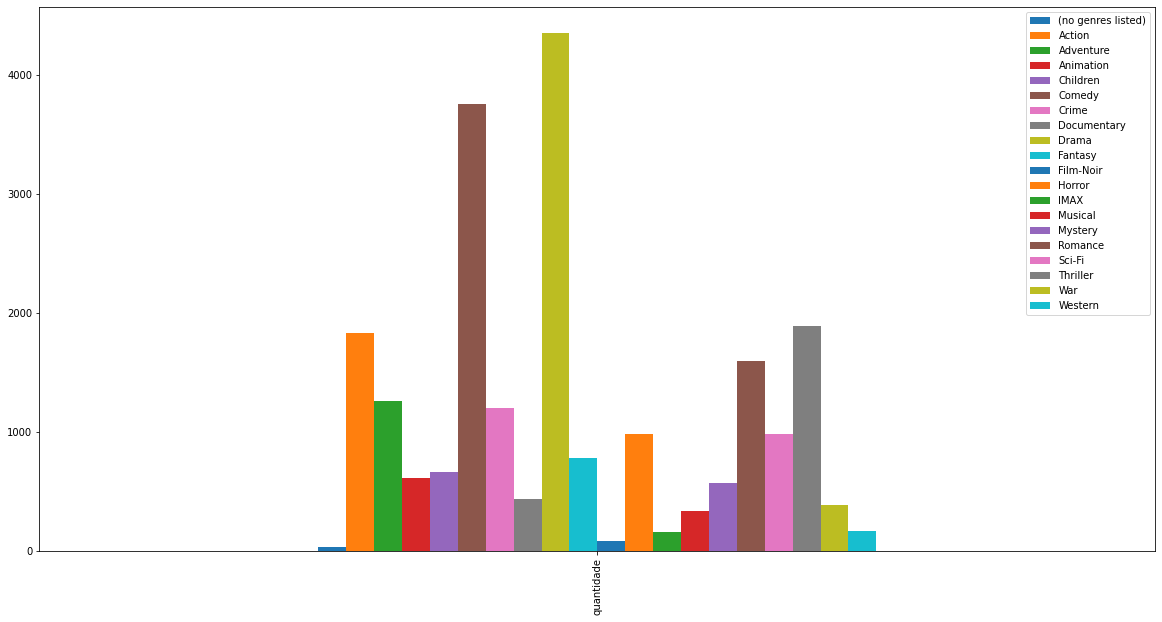

In [111]:
df_generos_disponiveis = pd.DataFrame(generos_disponiveis, index=['quantidade',])
df_generos_disponiveis

columns = sorted(df_generos_disponiveis.columns.tolist())

df_generos_disponiveis = df_generos_disponiveis[columns]
df_generos_disponiveis

df_generos_disponiveis.plot(kind='bar', figsize=(20,10))

<BarContainer object of 20 artists>

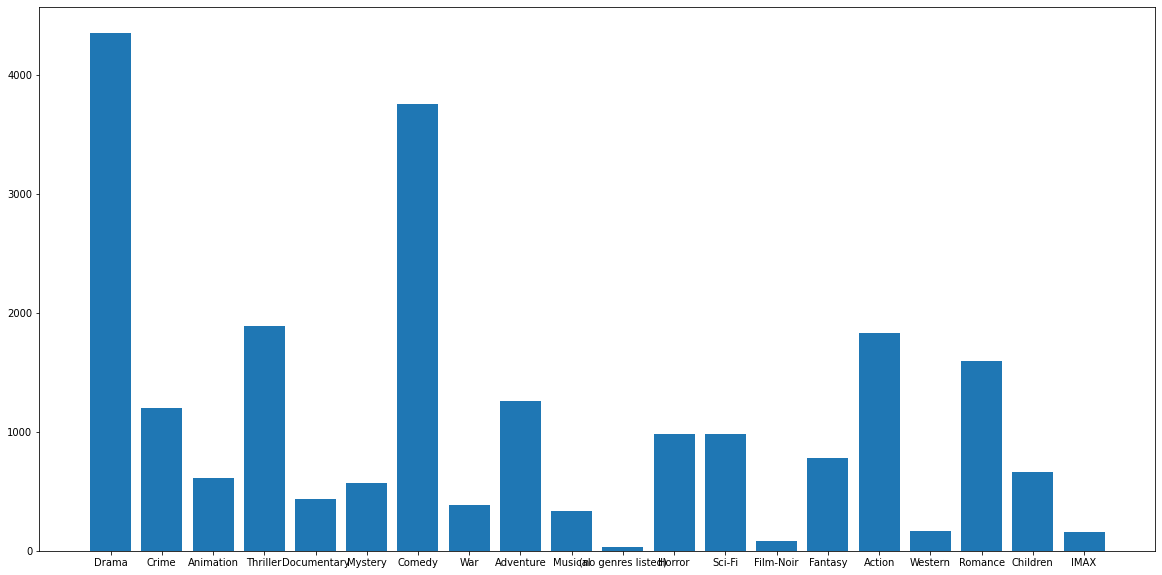

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.bar(generos_disponiveis.keys(), generos_disponiveis.values())